#**`Training Lenet`**

In [4]:
import torch
import torchvision
import torchvision.datasets
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [5]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.features=nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(6,16,5),
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2),
    )
    self.classifier=nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )
  def forward(self,x):
    #print(x.shape)
    x=self.features(x)
    #print(x.shape)
    x=x.view(x.size(0),-1)
    #print(x.shape)
    x=self.classifier(x)
    #print(x.shape)
    return x


In [6]:
batch_size=128

In [7]:
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [8]:
trainLoader=torch.utils.data.DataLoader(dataset=trainset,batch_size=batch_size,shuffle=True)

In [9]:
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms.ToTensor())

Files already downloaded and verified


In [10]:
testloader=torch.utils.data.DataLoader(dataset=testset,batch_size=batch_size,shuffle=False)

In [11]:
Lenet=LeNet()

In [12]:
def eval(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs,label=data
    outputs=Lenet(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=label.size(0)
    correct+=(pred==label).sum().item()
    return 100*correct/total

In [24]:
eval(trainLoader)

14.84375

In [19]:

import torch.optim as optim
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(Lenet.parameters())

In [31]:
loss_arr=[]
loss_epoch_arr=[]
epochs=20
for epoch in range(epochs):
  for i,data in enumerate(trainLoader):
    inputs,label=data
    
    outputs=Lenet(inputs)
    loss=loss_fn(outputs,label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_arr.append(loss.item())
  print("Loss : | "+str(loss.item())+" | epoch : |"+str(epoch)+" | batch : |" \
        +str(i)+"| train accuracy : |"+str(eval(trainLoader))+"| test accuracy : |"+str(eval(testloader))+"|")
  loss_epoch_arr.append(loss.item())

    
    


Loss : | 0.8908117413520813 | epoch : |0 | batch : |390| train accuracy : |71.875| test accuracy : |60.9375|
Loss : | 0.712399423122406 | epoch : |1 | batch : |390| train accuracy : |68.75| test accuracy : |60.15625|
Loss : | 0.8215492367744446 | epoch : |2 | batch : |390| train accuracy : |72.65625| test accuracy : |56.25|
Loss : | 0.7844428420066833 | epoch : |3 | batch : |390| train accuracy : |77.34375| test accuracy : |62.5|
Loss : | 0.7270179986953735 | epoch : |4 | batch : |390| train accuracy : |75.78125| test accuracy : |62.5|
Loss : | 0.9410772323608398 | epoch : |5 | batch : |390| train accuracy : |72.65625| test accuracy : |62.5|
Loss : | 0.9504968523979187 | epoch : |6 | batch : |390| train accuracy : |67.96875| test accuracy : |60.9375|
Loss : | 0.7207099199295044 | epoch : |7 | batch : |390| train accuracy : |72.65625| test accuracy : |61.71875|
Loss : | 0.925803005695343 | epoch : |8 | batch : |390| train accuracy : |76.5625| test accuracy : |61.71875|
Loss : | 0.747015

#2.**`Training The Network on GPU`**

In [16]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
def eval(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs,label=data
    inputs,label=inputs.to(device),label.to(device)
    outputs=Lenet(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=label.size(0)
    correct+=(pred==label).sum().item()
    return 100*correct/total

In [18]:
Lenet=LeNet().to(device)

In [20]:
loss_arr=[]
loss_epoch_arr=[]
epochs=20
for epoch in range(epochs):
  for i,data in enumerate(trainLoader):
    inputs,label=data
    inputs,label=inputs.to(device),label.to(device)
    
    outputs=Lenet(inputs)
    loss=loss_fn(outputs,label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_arr.append(loss.item())
  print("Loss : | "+str(loss.item())+" | epoch : |"+str(epoch)+" | batch : |" \
        +str(i)+"| train accuracy : |"+str(eval(trainLoader))+"| test accuracy : |"+str(eval(testloader))+"|")
  loss_epoch_arr.append(loss.item())

    
    


Loss : | 1.8222992420196533 | epoch : |0 | batch : |390| train accuracy : |50.0| test accuracy : |37.5|
Loss : | 1.6111118793487549 | epoch : |1 | batch : |390| train accuracy : |38.28125| test accuracy : |43.75|
Loss : | 1.5384080410003662 | epoch : |2 | batch : |390| train accuracy : |50.78125| test accuracy : |46.875|
Loss : | 1.3273192644119263 | epoch : |3 | batch : |390| train accuracy : |50.78125| test accuracy : |52.34375|
Loss : | 1.3717365264892578 | epoch : |4 | batch : |390| train accuracy : |52.34375| test accuracy : |53.125|
Loss : | 1.4120867252349854 | epoch : |5 | batch : |390| train accuracy : |52.34375| test accuracy : |53.125|
Loss : | 1.3792338371276855 | epoch : |6 | batch : |390| train accuracy : |50.0| test accuracy : |50.78125|
Loss : | 1.2749676704406738 | epoch : |7 | batch : |390| train accuracy : |64.0625| test accuracy : |55.46875|
Loss : | 1.2655460834503174 | epoch : |8 | batch : |390| train accuracy : |52.34375| test accuracy : |51.5625|
Loss : | 1.1389

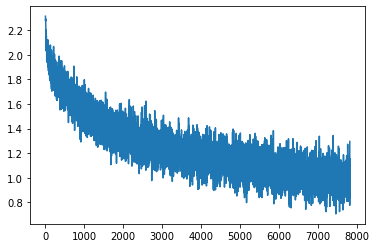

In [21]:
import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()